#### На этот раз данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день
для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
внутри каждой папки есть файл data.csv, где и хранятся данные
Схематично выглядит так:

└── data

   ├── 2020-12-30
   
   │  ├── FirstName_LastName1
   
   │  │   └── data.csv
   
   │  ├── FirstName_LastName2
   
   │  │   └── data.csv
   
   │  └── FirstName_LastName3
   
   │      └── data.csv
   
   └── 2020-12-31
   
      ├── FirstName_LastName1
      
      │   └── data.csv
      
      └── FirstName_LastName5
      
          └── data.csv
          
Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

Note: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

      

#### Задачи
1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [1]:
import pandas as pd
import os
import seaborn as sns

**Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).**

In [3]:
os.listdir('data')
# в пути доходим до той папки, в которой хранятся папки, названия которых нужны для данных в итоговом датафрейме

['2020-12-06',
 '2020-12-08',
 '2020-12-09',
 '2020-12-07',
 '2020-12-05',
 '2020-12-03',
 '2020-12-04']

In [4]:
os.getcwd()
# если папка не открывается, проверяем, в какой директории сейчас находимся

'/Users/tatanaterehova/Documents/courses/karpov/python/lesson_4'

In [5]:
path = 'data'
# сохраняем путь до папки, содержащей папки с нужными названиями
# теперь нужно просто перебрать все такие пути и добраться до каждого из файлов. Один из способов сделать это - использовать os.walk
# в цикле

In [6]:
os.walk(path)

<generator object _walk at 0x7fbdc822cf20>

In [7]:
list(os.walk(path))
# видим, что в листе хранятся кортежи с данными в следующем формате: путь, список папок по данному пути, список файлов. И таким образом
# os.walk() пробегает по всем папкам и файлам по указанному пути. Теперь в цикле можно сразу считывать путь, папки, файлы

[('data',
  ['2020-12-06',
   '2020-12-08',
   '2020-12-09',
   '2020-12-07',
   '2020-12-05',
   '2020-12-03',
   '2020-12-04'],
  []),
 ('data/2020-12-06', ['Vasiliy_Fedorov'], []),
 ('data/2020-12-06/Vasiliy_Fedorov', [], ['data.csv']),
 ('data/2020-12-08',
  ['Alexey_Fedorov',
   'Anton_Smirnov',
   'Kirill_Smirnov',
   'Rostislav_Petrov',
   'Petr_Petrov'],
  []),
 ('data/2020-12-08/Alexey_Fedorov', [], ['data.csv']),
 ('data/2020-12-08/Anton_Smirnov', [], ['data.csv']),
 ('data/2020-12-08/Kirill_Smirnov', [], ['data.csv']),
 ('data/2020-12-08/Rostislav_Petrov', [], ['data.csv']),
 ('data/2020-12-08/Petr_Petrov', [], ['data.csv']),
 ('data/2020-12-09',
  ['Anton_Ivanov',
   'Anton_Smirnov',
   'Rostislav_Petrov',
   'Petr_Fedorov',
   'Alexey_Smirnov',
   'Anton_Petrov',
   'Vasiliy_Ivanov'],
  []),
 ('data/2020-12-09/Anton_Ivanov', [], ['data.csv']),
 ('data/2020-12-09/Anton_Smirnov', [], ['data.csv']),
 ('data/2020-12-09/Rostislav_Petrov', [], ['data.csv']),
 ('data/2020-12-09/P

In [8]:
# Создаем df для всех данных
df = pd.DataFrame()
# Считываем все файлы данных и добавляем их в общий df
for current_path, dirs, files in os.walk(path):
    for file in files:
#         вложенный цикл создаем для того, чтобы пробегаться по всем файлам внутри папки; в нашем случае файл один, но в общем
#         случае файлов может быть сколько угодно
        data_path = f'{current_path}/{file}'
#         если указать просто file в качестве пути для файла, то получим ошибку, потому что файл будет искаться в домашней директории,
#         следовательно, путь нужно каждый раз перезаписывать
        temp_df = pd.read_csv(data_path)
#         name, date
#         добавляем колонки date, name, которые достаем из текущего пути, разбив его с помощью split()
        path_parts = current_path.split('/') 
        date = path_parts[-2]
        name = path_parts[-1]
        temp_df['date'] = date
        temp_df['name'] = name
        
        df = pd.concat((df, temp_df))
        
       
        


In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True) # индексы шли вразнобой, повторялись, поэтому их просто скинули. Drop указываем
# для того, чтобы новый столбец с индексами тоже скидывался

In [11]:
df

,product_id,quantity,date,name
0,56,4,2020-12-06,Vasiliy_Fedorov
1,97,3,2020-12-06,Vasiliy_Fedorov
2,79,3,2020-12-06,Vasiliy_Fedorov
3,29,5,2020-12-06,Vasiliy_Fedorov
4,73,5,2020-12-08,Alexey_Fedorov
...,...,...,...,...
156,3,4,2020-12-04,Kirill_Fedorov
157,89,5,2020-12-04,Kirill_Fedorov
158,75,2,2020-12-04,Kirill_Fedorov
159,41,5,2020-12-04,Kirill_Fedorov


In [12]:
df.quantity.sum()

480

**Сделаем то же самое другим способом**

In [13]:
from pathlib import Path
# Path создает объект PosixPath из строки с путем

In [14]:
path = Path('data')

In [15]:
dir(Path) # все атрибуты и методы объекта Path

['__bytes__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_accessor',
 '_cached_cparts',
 '_cparts',
 '_drv',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_from_parts',
 '_hash',
 '_init',
 '_make_child',
 '_make_child_relpath',
 '_opener',
 '_parse_args',
 '_parts',
 '_pparts',
 '_raw_open',
 '_root',
 '_str',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir',
 'is_fifo',
 'is_file',
 'is_mount',
 'is_relative_to',
 'is_reserved',
 'is

In [16]:
df = pd.DataFrame()
for current_path, dirs, files in os.walk(path):
    for file in files:
        part_path = Path(current_path)
        data_path = part_path / file
        temp_df = pd.read_csv(data_path)
        
        # выделяем дату и имя
        date = data_path.parts[-3]
        name = data_path.parts[-2]
        
        # добавляем нужные столбцы
        temp_df['date'] = date
        temp_df['name'] = name
        
        df = pd.concat((df, temp_df))
        
df.drop(columns=['Unnamed: 0'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [17]:
data_path.parts

('data', '2020-12-04', 'Kirill_Fedorov', 'data.csv')

In [18]:
df

,product_id,quantity,date,name
0,56,4,2020-12-06,Vasiliy_Fedorov
1,97,3,2020-12-06,Vasiliy_Fedorov
2,79,3,2020-12-06,Vasiliy_Fedorov
3,29,5,2020-12-06,Vasiliy_Fedorov
4,73,5,2020-12-08,Alexey_Fedorov
...,...,...,...,...
156,3,4,2020-12-04,Kirill_Fedorov
157,89,5,2020-12-04,Kirill_Fedorov
158,75,2,2020-12-04,Kirill_Fedorov
159,41,5,2020-12-04,Kirill_Fedorov


**Еще один способ**

In [19]:
path = 'data'

In [20]:
miniproject_path = Path(path)
list(miniproject_path.glob('**/*.csv'))
# ** - можно опускаться на любое число директорий с любыми названиями
# * - любые символы перед .csv

[PosixPath('data/2020-12-06/Vasiliy_Fedorov/data.csv'),
 PosixPath('data/2020-12-08/Alexey_Fedorov/data.csv'),
 PosixPath('data/2020-12-08/Anton_Smirnov/data.csv'),
 PosixPath('data/2020-12-08/Kirill_Smirnov/data.csv'),
 PosixPath('data/2020-12-08/Rostislav_Petrov/data.csv'),
 PosixPath('data/2020-12-08/Petr_Petrov/data.csv'),
 PosixPath('data/2020-12-09/Anton_Ivanov/data.csv'),
 PosixPath('data/2020-12-09/Anton_Smirnov/data.csv'),
 PosixPath('data/2020-12-09/Rostislav_Petrov/data.csv'),
 PosixPath('data/2020-12-09/Petr_Fedorov/data.csv'),
 PosixPath('data/2020-12-09/Alexey_Smirnov/data.csv'),
 PosixPath('data/2020-12-09/Anton_Petrov/data.csv'),
 PosixPath('data/2020-12-09/Vasiliy_Ivanov/data.csv'),
 PosixPath('data/2020-12-07/Petr_Smirnov/data.csv'),
 PosixPath('data/2020-12-07/Anton_Ivanov/data.csv'),
 PosixPath('data/2020-12-07/Rostislav_Fedorov/data.csv'),
 PosixPath('data/2020-12-07/Alexey_Fedorov/data.csv'),
 PosixPath('data/2020-12-07/Anton_Smirnov/data.csv'),
 PosixPath('data/2

In [21]:
df = pd.DataFrame()

for csv_path in miniproject_path.glob('**/*.csv'):
    temp_df = pd.read_csv(csv_path)
    # выделяем дату и имя
    date = csv_path.parts[-3]
    name = csv_path.parts[-2]
        
        # добавляем нужные столбцы
    temp_df['date'] = date
    temp_df['name'] = name
    
    df = pd.concat((df, temp_df))
df.drop(columns=['Unnamed: 0'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [22]:
df

,product_id,quantity,date,name
0,56,4,2020-12-06,Vasiliy_Fedorov
1,97,3,2020-12-06,Vasiliy_Fedorov
2,79,3,2020-12-06,Vasiliy_Fedorov
3,29,5,2020-12-06,Vasiliy_Fedorov
4,73,5,2020-12-08,Alexey_Fedorov
...,...,...,...,...
156,3,4,2020-12-04,Kirill_Fedorov
157,89,5,2020-12-04,Kirill_Fedorov
158,75,2,2020-12-04,Kirill_Fedorov
159,41,5,2020-12-04,Kirill_Fedorov


**Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например:**

**Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev**

In [23]:
df.groupby('name', as_index=False).agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


**Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:**

**по оси x – идентификаторы товаров (product_id)** 

**по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)**

**Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order).** 

**В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.**

In [24]:
top10 = df.groupby('product_id', as_index=False).agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False).head(10)

/Users/tatanaterehova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

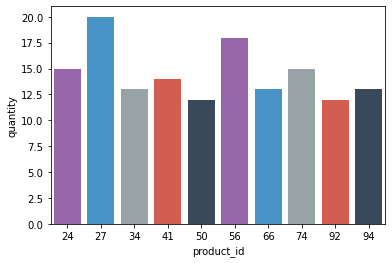

In [25]:
sns.barplot(top10.product_id, top10.quantity, palette=['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e'])
# если указать в палитре меньше цветов, чем столбцов в барплоте, эти цвета будут повторяться по кругу

**Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).** 

In [26]:
quan_vs_date = df.groupby('date', as_index=False).agg({'quantity': 'sum'})

/Users/tatanaterehova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='quantity'>

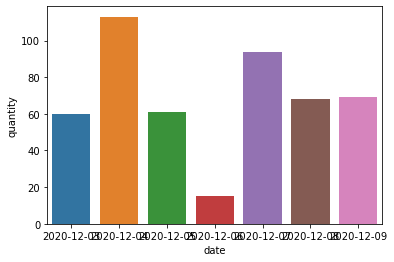

In [27]:
sns.barplot(quan_vs_date.date, quan_vs_date.quantity)

In [28]:
quan_vs_date

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


**Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.**

**Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.**

In [29]:
dup = df.drop_duplicates(subset=['product_id', 'name'])

In [30]:
dup

,product_id,quantity,date,name
0,56,4,2020-12-06,Vasiliy_Fedorov
1,97,3,2020-12-06,Vasiliy_Fedorov
2,79,3,2020-12-06,Vasiliy_Fedorov
3,29,5,2020-12-06,Vasiliy_Fedorov
4,73,5,2020-12-08,Alexey_Fedorov
...,...,...,...,...
156,3,4,2020-12-04,Kirill_Fedorov
157,89,5,2020-12-04,Kirill_Fedorov
158,75,2,2020-12-04,Kirill_Fedorov
159,41,5,2020-12-04,Kirill_Fedorov


Другой вариант:

In [31]:
df.groupby(['name', 'product_id']) \
    .agg({'date': 'nunique'}) \
    .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
